In [1]:
import pandas as pd
kaur_eu=pd.read_csv("../final_figures/eu.inpeaks.kaur.tsv", sep="\t", header=0)


In [2]:
import pandas as pd
import numpy as np
eus = pd.read_csv("../final_figures_new/Eu.new.CaQTLS.tsv", sep="\t", header=0)
datan = eus.merge(kaur_eu, left_on=["Ref", "Alt", "RsID"], right_on=["ref", "alt", "rsid"], how="inner").drop_duplicates()


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0.7525696609368799, 0.0)

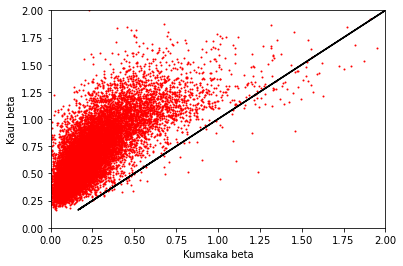

In [3]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt



distal_rsids = list(set(datan[(datan["Inside_Peak"]==2) & (datan["Log10_BF"]>3)]["RsID"].values))
data1 = datan[datan["Inside_Peak"]==1]
data1["log10p"] = -1*np.log(data1["pvalue"])

th=5
plt.scatter(abs(data1[data1["log10p"]>th]["Beta"]), abs(data1[data1["log10p"]>th]["beta"]), s=1, c='r')

plt.xlabel("Kumsaka beta")
plt.ylabel("Kaur beta")
plt.plot(abs(data1[data1["log10p"]>th]["beta"]), abs(data1[data1["log10p"]>th]["beta"]),  c='k')
plt.xlim((0,2))
plt.ylim((0,2))
pearsonr(abs(data1[data1["log10p"]>th]["beta"]),abs(data1[data1["log10p"]>th]["Beta"]))


In [4]:
print("only local")
pearsonr(abs(data1[(data1["log10p"]>th) &  ~(data1["RsID"].isin(distal_rsids))]["Beta"]), abs(data1[(data1["log10p"]>th) &  ~(data1["RsID"].isin(distal_rsids))]["beta"]))


only local


(0.7479207429626905, 0.0)

In [5]:
print("distal too")
pearsonr(abs(data1[(data1["log10p"]>th) &  (data1["RsID"].isin(distal_rsids))]["Beta"]), abs(data1[(data1["log10p"]>th) &  (data1["RsID"].isin(distal_rsids))]["beta"]))


distal too


(0.6765798015696909, 4.0138740501326115e-77)

In [6]:
data1["log10p"].min()

9.800480231379623e-05

(0.5466470291205056, 0.0)

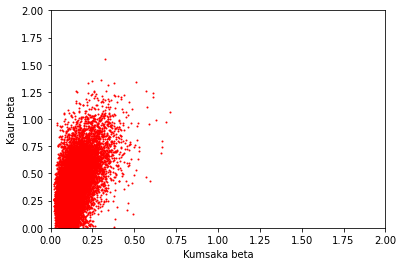

In [7]:
from scipy.stats import pearsonr
threshold=-1
plt.scatter(abs(data1[(data1["Log10_BF"]>-1)&(data1["Log10_BF"]<3)]["Beta"]), abs(data1[(data1["Log10_BF"]>-1)&(data1["Log10_BF"]<3)]["beta"]), s=1, c='r')


plt.xlabel("Kumsaka beta")
plt.ylabel("Kaur beta")
#plt.plot(abs(data1[data1["Log10_BF"]<3]["beta"]), abs(data1[data1["Log10_BF"]<3]["beta"]),  c='k')
plt.xlim((0,2))
plt.ylim((0,2))
pearsonr(abs(data1[(data1["Log10_BF"]>-1)&(data1["Log10_BF"]<3)]["beta"]),abs(data1[(data1["Log10_BF"]>-1)&(data1["Log10_BF"]<3)]["Beta"]))

(0.415398813306908, 0.0)

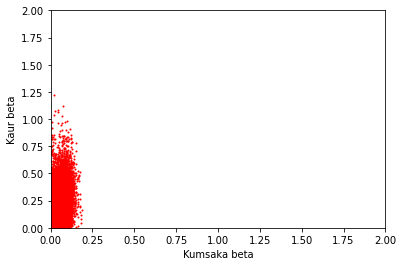

In [8]:
from scipy.stats import pearsonr
threshold=-1
plt.scatter(abs(data1[(data1["Log10_BF"]>-5)&(data1["Log10_BF"]<-1)]["Beta"]), abs(data1[(data1["Log10_BF"]>-5)&(data1["Log10_BF"]<-1)]["beta"]), s=1, c='r')


plt.xlabel("Kumsaka beta")
plt.ylabel("Kaur beta")
#plt.plot(abs(data1[data1["Log10_BF"]<3]["beta"]), abs(data1[data1["Log10_BF"]<3]["beta"]),  c='k')
plt.xlim((0,2))
plt.ylim((0,2))
pearsonr(abs(data1[(data1["Log10_BF"]>-5)&(data1["Log10_BF"]<-1)]["beta"]),abs(data1[(data1["Log10_BF"]>-5)&(data1["Log10_BF"]<-1)]["Beta"]))

(0.7452742929842012, 0.0)

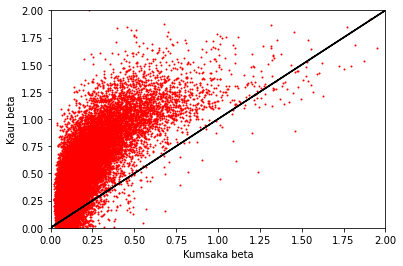

In [9]:
from scipy.stats import pearsonr
threshold=-1
plt.scatter(abs(data1[data1["Log10_BF"]>threshold]["Beta"]), abs(data1[data1["Log10_BF"]>threshold]["beta"]), s=1, c='r')


plt.xlabel("Kumsaka beta")
plt.ylabel("Kaur beta")
plt.plot(abs(data1[data1["Log10_BF"]>threshold]["beta"]), abs(data1[data1["Log10_BF"]>threshold]["beta"]),  c='k')
plt.xlim((0,2))
plt.ylim((0,2))
pearsonr(abs(data1[data1["Log10_BF"]>threshold]["beta"]),abs(data1[data1["Log10_BF"]>threshold]["Beta"]))

In [10]:
print("only local")

pearsonr(abs(data1[(data1["Log10_BF"]>threshold) &  ~(data1["RsID"].isin(distal_rsids))]["Beta"]), abs(data1[(data1["Log10_BF"]>threshold) &  ~(data1["RsID"].isin(distal_rsids))]["beta"]))


only local


(0.7403681278936277, 0.0)

In [11]:
print("distal too")

pearsonr(abs(data1[(data1["Log10_BF"]>threshold) &  (data1["RsID"].isin(distal_rsids))]["Beta"]), abs(data1[(data1["Log10_BF"]>threshold) &  (data1["RsID"].isin(distal_rsids))]["beta"]))


distal too


(0.6885152817255216, 1.1347623759772453e-83)

<AxesSubplot:>

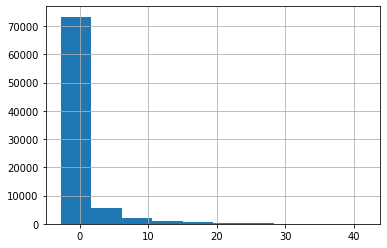

In [12]:
data1["Log10_BF"].hist()

In [13]:
data1["Log10_BF"].min()

-2.74001910180254

In [32]:
steps = np.arange(-2.0, 30, 0.2)
x_values=[]
y_values=[]
for i in range(len(steps)):
    if pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) ]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i])]["beta"]))[1] < 1e-3:
        x_values.append(steps[i].astype(str))
        y_values.append(pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) ]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i]) ]["beta"]))[0])
    else:
        x_values.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
        y_values.append(0)


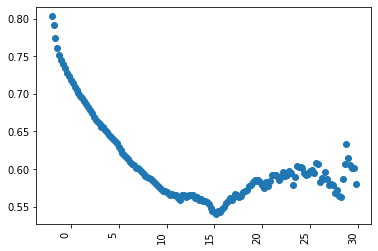

In [33]:
plt.scatter(steps,y_values)
plt.xticks(rotation=90, ha='right')
plt.show()


In [34]:
print("only local")
steps = np.arange(-2.0, 30, 0.2)
x_values_l=[]
y_values_l=[]
# for i in range(len(steps[:-1])):
#     try:
#         if pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids)) & (data1["Log10_BF"]<=steps[i+1])]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids)) &  (data1["Log10_BF"]<=steps[i+1])]["beta"]))[1] < 1e-3:
#             x_values_l.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
#             y_values_l.append(pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids)) &  (data1["Log10_BF"]<=steps[i+1])]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i])&  ~(data1["RsID"].isin(distal_rsids)) &  (data1["Log10_BF"]<=steps[i+1])]["beta"]))[0])
#         else:
#             x_values_l.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
#             y_values_l.append(0)

#     except:
#         x_values_l.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
#         y_values_l.append(0)

for i in range(len(steps)):
    try:
        if pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids)) ]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids)) ]["beta"]))[1] < 1e-3:
            x_values_l.append(steps[i].astype(str))
            y_values_l.append(pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids)) ]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids))]["beta"]))[0])
        else:
            x_values_l.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
            y_values_l.append(0)

    except:
        x_values_l.append(steps[i].astype(str))
        y_values_l.append(0)


only local


In [35]:
print("only distal")
steps = np.arange(-2.0, 30, 0.2)
x_values_d=[]
y_values_d=[]
# for i in range(len(steps[:-1])):
#     try:
#         if pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) &  (data1["RsID"].isin(distal_rsids)) & (data1["Log10_BF"]<=steps[i+1])]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i]) &  (data1["RsID"].isin(distal_rsids)) &  (data1["Log10_BF"]<=steps[i+1])]["beta"]))[1] < 1e-3:
#             x_values_d.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
#             y_values_d.append(pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) &  (data1["RsID"].isin(distal_rsids)) &  (data1["Log10_BF"]<=steps[i+1])]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i])&  (data1["RsID"].isin(distal_rsids)) &  (data1["Log10_BF"]<=steps[i+1])]["beta"]))[0])
#         else:
#             x_values_d.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
#             y_values_d.append(0)
#     except:
#         x_values_d.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
#         y_values_d.append(0)

for i in range(len(steps)):
    try:
        if pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) &  (data1["RsID"].isin(distal_rsids)) ]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i]) &  (data1["RsID"].isin(distal_rsids)) ]["beta"]))[1] < 1e-3:
            x_values_d.append(steps[i].astype(str))
            y_values_d.append(pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) &  (data1["RsID"].isin(distal_rsids))]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i])&  (data1["RsID"].isin(distal_rsids)) ]["beta"]))[0])
        else:
            x_values_d.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
            y_values_d.append(0)
    except:
        x_values_d.append(steps[i].astype(str))
        y_values_d.append(0)


only distal


In [36]:
newx=[]
newy=[]
for i in range(len(x_values_l)):
    if y_values_l[i] !=0 and y_values[i] !=0:
        
        if y_values_l[i] >= y_values[i]+0.01:
            newy.append(1)
            newx.append(x_values_l[i])
        else:
            newy.append(-1)
            newx.append(x_values_l[i])
 

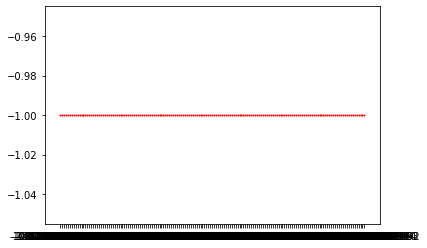

In [37]:
plt.scatter(newx,newy, c="red", s=1)


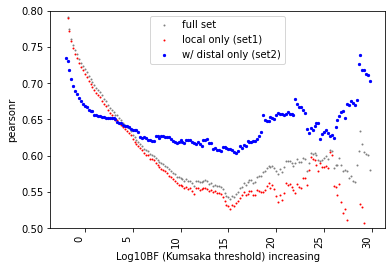

In [38]:
plt.scatter(steps,y_values,c="grey", s=1, label="full set")
plt.scatter(steps,y_values_l, c="red", s=1, label="local only (set1)")
plt.scatter(steps,y_values_d, c="blue", s=5, label="w/ distal only (set2)")
plt.ylim((0.5,0.8))
#plt.xlim((3,30))

plt.xticks(rotation=90, ha='right')
plt.legend()
plt.xlabel("Log10BF (Kumsaka threshold) increasing")
plt.ylabel("pearsonr")
plt.show()

In [39]:
steps = np.arange(0, 70, 1)
x_values=[]
y_values=[]
for i in range(len(steps)):
    if pearsonr(abs(data1[(data1["log10p"]>steps[i]) ]["Beta"]), abs(data1[(data1["log10p"]>steps[i])]["beta"]))[1] < 1e-3:
        x_values.append(steps[i].astype(str))
        y_values.append(pearsonr(abs(data1[(data1["log10p"]>steps[i]) ]["Beta"]), abs(data1[(data1["log10p"]>steps[i]) ]["beta"]))[0])
    else:
        x_values.append(steps[i].astype(str))
        y_values.append(0)


In [40]:
print("only local")
steps = np.arange(0, 70, 1)
x_values_l=[]
y_values_l=[]
# for i in range(len(steps[:-1])):
#     try:
#         if pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids)) & (data1["Log10_BF"]<=steps[i+1])]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids)) &  (data1["Log10_BF"]<=steps[i+1])]["beta"]))[1] < 1e-3:
#             x_values_l.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
#             y_values_l.append(pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids)) &  (data1["Log10_BF"]<=steps[i+1])]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i])&  ~(data1["RsID"].isin(distal_rsids)) &  (data1["Log10_BF"]<=steps[i+1])]["beta"]))[0])
#         else:
#             x_values_l.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
#             y_values_l.append(0)

#     except:
#         x_values_l.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
#         y_values_l.append(0)

for i in range(len(steps)):
    try:
        if pearsonr(abs(data1[(data1["log10p"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids)) ]["Beta"]), abs(data1[(data1["log10p"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids)) ]["beta"]))[1] < 1e-3:
            x_values_l.append(steps[i].astype(str))
            y_values_l.append(pearsonr(abs(data1[(data1["log10p"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids)) ]["Beta"]), abs(data1[(data1["log10p"]>steps[i]) &  ~(data1["RsID"].isin(distal_rsids))]["beta"]))[0])
        else:
            x_values_l.append(steps[i].astype(str))
            y_values_l.append(0)

    except:
        x_values_l.append(steps[i].astype(str))
        y_values_l.append(0)


only local


In [41]:
print("only distal")
steps = np.arange(0, 70, 1)
x_values_d=[]
y_values_d=[]
# for i in range(len(steps[:-1])):
#     try:
#         if pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) &  (data1["RsID"].isin(distal_rsids)) & (data1["Log10_BF"]<=steps[i+1])]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i]) &  (data1["RsID"].isin(distal_rsids)) &  (data1["Log10_BF"]<=steps[i+1])]["beta"]))[1] < 1e-3:
#             x_values_d.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
#             y_values_d.append(pearsonr(abs(data1[(data1["Log10_BF"]>steps[i]) &  (data1["RsID"].isin(distal_rsids)) &  (data1["Log10_BF"]<=steps[i+1])]["Beta"]), abs(data1[(data1["Log10_BF"]>steps[i])&  (data1["RsID"].isin(distal_rsids)) &  (data1["Log10_BF"]<=steps[i+1])]["beta"]))[0])
#         else:
#             x_values_d.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
#             y_values_d.append(0)
#     except:
#         x_values_d.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
#         y_values_d.append(0)

for i in range(len(steps)):
    try:
        if pearsonr(abs(data1[(data1["log10p"]>steps[i]) &  (data1["RsID"].isin(distal_rsids)) ]["Beta"]), abs(data1[(data1["log10p"]>steps[i]) &  (data1["RsID"].isin(distal_rsids)) ]["beta"]))[1] < 1e-3:
            x_values_d.append(steps[i].astype(str))
            y_values_d.append(pearsonr(abs(data1[(data1["log10p"]>steps[i]) &  (data1["RsID"].isin(distal_rsids))]["Beta"]), abs(data1[(data1["log10p"]>steps[i])&  (data1["RsID"].isin(distal_rsids)) ]["beta"]))[0])
        else:
            x_values_d.append(steps[i].astype(str))
            y_values_d.append(0)
    except:
        x_values_d.append(steps[i].astype(str))
        y_values_d.append(0)


only distal


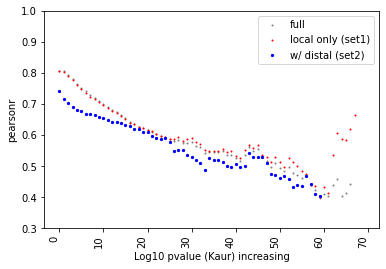

In [42]:
plt.scatter(steps,y_values,c="grey", s=1, label="full")
plt.scatter(steps,y_values_l, c="red", s=1, label="local only (set1)")
plt.scatter(steps,y_values_d, c="blue", s=5, label="w/ distal (set2)")
plt.ylim((0.3,1.0))
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.xlabel("Log10 pvalue (Kaur) increasing")
plt.ylabel("pearsonr")
#plt.xlim((7,70))
plt.show()